<a href="https://colab.research.google.com/github/Swati55/IPLballbyballBy/blob/main/IplProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np

#Getting to know our data

In the first part of our project, we will consider **IPL ball by ball data. **

This data contains IPL records from **2008 to 2022**

Quick analysis to get to know the data:


*   Size of data set

*   Are there any null values? Is it a concern?

*   Are there any redundencies in the data?

*   What are the column in data set






In [ ]:
df=pd.read_csv('ipl_one.csv')

In [ ]:
df.head(6)


,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
5,1312200,1,0,6,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [ ]:
pd.DataFrame(df.columns)

,0
0,ID
1,innings
2,overs
3,ballnumber
4,batter
5,bowler
6,non-striker
7,extra_type
8,batsman_run
9,extras_run


In [ ]:
print("Shape :", df.shape)
print("\n null values :")
print(df.isnull().sum())

Shape : (225954, 17)

 null values :
ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64


In [ ]:
print("\n Total teams :",len(df.BattingTeam.unique()))
print("\n Team names :\n",df.BattingTeam.unique())



 Total teams : 18

 Team names :
 ['Rajasthan Royals' 'Gujarat Titans' 'Royal Challengers Bangalore'
 'Lucknow Super Giants' 'Sunrisers Hyderabad' 'Punjab Kings'
 'Delhi Capitals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Rising Pune Supergiants'
 'Pune Warriors' 'Deccan Chargers' 'Kochi Tuskers Kerala']


Observe that in the team names, old team names and new team names are repeated, which is a problem. Before everything else, we will merge old and new team names.

In [ ]:
def merge_names(x):
  if x=="Deccan Chargers":
    return "Sunrisers Hyderabad"
  elif x=='Rising Pune Supergiant'or x=='Pune Warriors':
    return 'Rising Pune Supergiants'
  elif x=='Delhi Daredevils':
    return 'Delhi Capitals'
  elif x=='Kings XI Punjab':
    return 'Punjab Kings'
  elif x=='Gujarat Lions':
    return 'Gujarat Titans'
  else:
    return x
df['BattingTeam']=df['BattingTeam'].apply(merge_names)

In [ ]:
print("\n Total teams :",len(df.BattingTeam.unique()))
print("\n Team names :\n",df.BattingTeam.unique())


 Total teams : 12

 Team names :
 ['Rajasthan Royals' 'Gujarat Titans' 'Royal Challengers Bangalore'
 'Lucknow Super Giants' 'Sunrisers Hyderabad' 'Punjab Kings'
 'Delhi Capitals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Rising Pune Supergiants' 'Kochi Tuskers Kerala']


In [ ]:
len(df['BattingTeam'].unique())

12

#winning percentage

Note that only runs made per ball is present in the database, so first we will group the data inningwise to get runs made per inning

In [ ]:
inning_wise_runs= df[["ID","innings","total_run","BattingTeam"]].copy()
total_runs=inning_wise_runs.groupby(["ID","innings","BattingTeam"])['total_run'].sum().reset_index()
total_runs.head(4)

#this table has total runs made by the teams in per innings

,ID,innings,BattingTeam,total_run
0,335982,1,Kolkata Knight Riders,222
1,335982,2,Royal Challengers Bangalore,82
2,335983,1,Chennai Super Kings,240
3,335983,2,Punjab Kings,207


In [ ]:
#calculating total no. of matches played by each team
total_matches_played=total_runs['BattingTeam'].value_counts().to_frame().reset_index().sort_values('index')
tot_mat1=total_matches_played.reset_index()
tot_mat1

,level_0,index,BattingTeam
0,6,Chennai Super Kings,209
1,3,Delhi Capitals,228
2,9,Gujarat Titans,47
3,11,Kochi Tuskers Kerala,14
4,4,Kolkata Knight Riders,227
5,10,Lucknow Super Giants,15
6,0,Mumbai Indians,236
7,5,Punjab Kings,223
8,7,Rajasthan Royals,194
9,8,Rising Pune Supergiants,75


from matplotlib import pyplot as plt
tot_mat1['level_0'].plot(kind='hist', bins=20, title='level_0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tot_mat1['BattingTeam'].plot(kind='hist', bins=20, title='BattingTeam')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tot_mat1.plot(kind='scatter', x='level_0', y='BattingTeam', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tot_mat1['level_0'].plot(kind='line', figsize=(8, 4), title='level_0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
tot_mat1['BattingTeam'].plot(kind='line', figsize=(8, 4), title='BattingTeam')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#now we will find winning team for each match a list and add winning team of each match to a list
l4=total_runs['ID'].unique()
fill_it=list()
for i in l4:
  a=total_runs[(total_runs['ID']==i)&(total_runs['innings']==1)]['total_run'].tolist()
  b=total_runs[(total_runs['ID']==i)&(total_runs['innings']==2)]['total_run'].tolist()
  if a>b:
    winby=(total_runs[(total_runs['ID']==i)&(total_runs['innings']==1)]['BattingTeam']).tolist()
    fill_it.append(winby)

  elif a<b:
    winby=(total_runs[(total_runs['ID']==i)&(total_runs['innings']==2)]['BattingTeam']).tolist()
    fill_it.append(winby)
  else:
    winby=["tie"]
    fill_it.append(winby)

fill_it

def flatten_list(l):
  return list(itertools.chain(*l))

flat_list=flatten_list(fill_it)
len(flat_list)

950

In [ ]:
#flat_list

In [ ]:
#to get no of wins, count no. of times a teamname has appeared in generated list
index_series=list(range(1,951))
new_team_df=pd.DataFrame(index_series)
new_team_df['no_of_wins']=flat_list
win_count=new_team_df['no_of_wins'].value_counts().to_frame().reset_index().sort_values('index')
win_count
#we will remove 'tie' row first
win_count1=win_count.drop(10).reset_index()
win_count1=win_count1.drop('level_0',axis=1)
win_count1

,index,no_of_wins
0,Chennai Super Kings,121
1,Delhi Capitals,104
2,Gujarat Titans,25
3,Kochi Tuskers Kerala,6
4,Kolkata Knight Riders,111
5,Lucknow Super Giants,9
6,Mumbai Indians,129
7,Punjab Kings,98
8,Rajasthan Royals,94
9,Rising Pune Supergiants,26


In [ ]:
#now we will calculate winning percentage,

win_percent=tot_mat1.merge(win_count1,on='index')
winper=win_percent['no_of_wins']/win_percent['BattingTeam']*100
#win_percent.insert(loc=3,column="no_of_loss",value=loss)
win_percent['winning_percentage']=winper
win_percent['no_of_loss']=win_percent['BattingTeam']-win_percent['no_of_wins']
win_percent=win_percent.drop(['level_0'],axis=1)
win_percent

,index,BattingTeam,no_of_wins,winning_percentage,no_of_loss
0,Chennai Super Kings,209,121,57.894737,88
1,Delhi Capitals,228,104,45.614035,124
2,Gujarat Titans,47,25,53.191489,22
3,Kochi Tuskers Kerala,14,6,42.857143,8
4,Kolkata Knight Riders,227,111,48.898678,116
5,Lucknow Super Giants,15,9,60.000000,6
6,Mumbai Indians,236,129,54.661017,107
7,Punjab Kings,223,98,43.946188,125
8,Rajasthan Royals,194,94,48.453608,100
9,Rising Pune Supergiants,75,26,34.666667,49


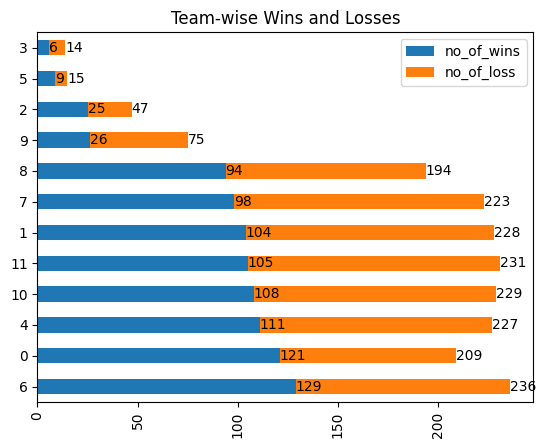

In [ ]:
# Stacked bar plot for wins and losses
ylab_stack=win_percent['index']
stacked_win_lose_plot = win_percent.reset_index(drop=True)[['no_of_wins', 'no_of_loss']].sort_values(by='no_of_wins', ascending=False).plot.barh(stacked=True)

# Add annotations with numbers
for container in stacked_win_lose_plot.containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

plt.xticks(rotation=90)
plt.title('Team-wise Wins and Losses')
plt.show()

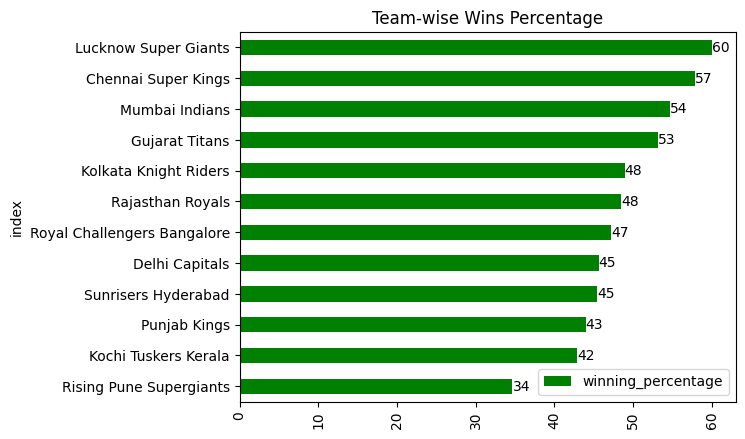

In [ ]:
wins_plot = win_percent.sort_values('winning_percentage').plot.barh(x='index', y='winning_percentage', rot=0,color='green')
for container in wins_plot.containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

plt.xticks(rotation=90)
plt.title('Team-wise Wins Percentage')
plt.show()

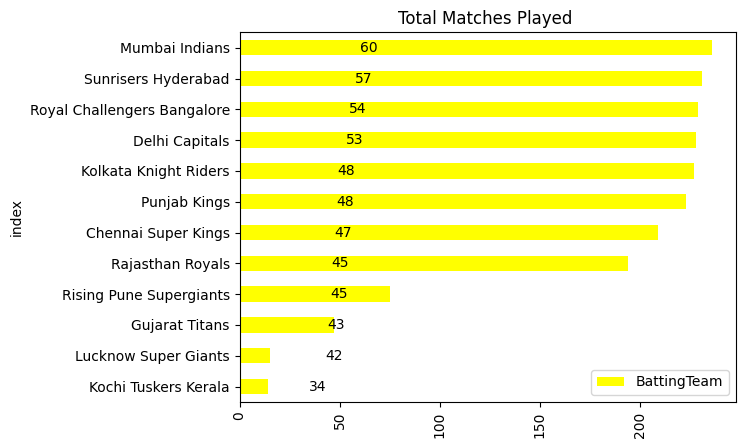

In [ ]:
tot_mat1 = win_percent.sort_values('BattingTeam').plot.barh(x='index', y='BattingTeam', rot=0,color='yellow')
for container in wins_plot.containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

plt.xticks(rotation=90)
plt.title('Total Matches Played ')
plt.show()

#consistency


*   A players' batting average is the total number of runs they have scored. The higher the batting avg, the higher better the batter is performing

*   a player's bowling average is the number of runs they have conceded per wicket taken. The lower the bowling average is, the better the bowler is performing.


*   Batting strike rate (s/r) is defined for a batter as the average number of runs scored per 100 balls faced.

*    Bowler's economy is average number of runs they have conceded per over bowled

<ipython-input-29-4d286df8e0b0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  consistency_table=pd.DataFrame(df.groupby(['batter'])['total_run','isWicketDelivery','ballnumber'].sum().reset_index())


Mean balls faced : 1351.895867768595
Mean runs scored : 489.41652892561984


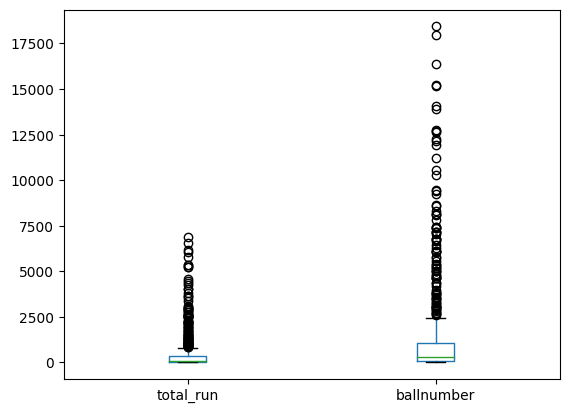

In [ ]:
#batsmen consistency
consistency_table=pd.DataFrame(df.groupby(['batter'])['total_run','isWicketDelivery','ballnumber'].sum().reset_index())
consistency_table.boxplot(column =['total_run','ballnumber'], grid = False)
print("Mean balls faced :",consistency_table['ballnumber'].mean())
print("Mean runs scored :",consistency_table['total_run'].mean())

In [ ]:
#considering only above mean entries
consistency_table=consistency_table[(consistency_table['total_run']>500)&(consistency_table['ballnumber']>1350)]


In [ ]:
#consistency_table.boxplot(column =['total_run','ballnumber'], grid = False)


In [ ]:
consistency_table['batting_avg']= consistency_table['total_run']/consistency_table['isWicketDelivery']
consistency_table['strike_rate']=consistency_table['total_run']/consistency_table['ballnumber']*100
consistency_table.sort_values('strike_rate',ascending=False)

,batter,total_run,isWicketDelivery,ballnumber,batting_avg,strike_rate
36,AD Russell,2154,66,4648,32.636364,46.342513
508,SP Narine,1101,64,2415,17.203125,45.590062
571,V Sehwag,2915,98,6664,29.744898,43.742497
396,PP Shaw,1644,61,3783,26.950820,43.457573
183,GJ Maxwell,2451,90,5740,27.233333,42.700348
...,...,...,...,...,...,...
226,JH Kallis,2567,89,8122,28.842697,31.605516
405,R Ashwin,678,48,2183,14.125000,31.058177
486,SC Ganguly,1464,54,4837,27.111111,30.266694
394,PP Chawla,620,51,2063,12.156863,30.053320


<Axes: >

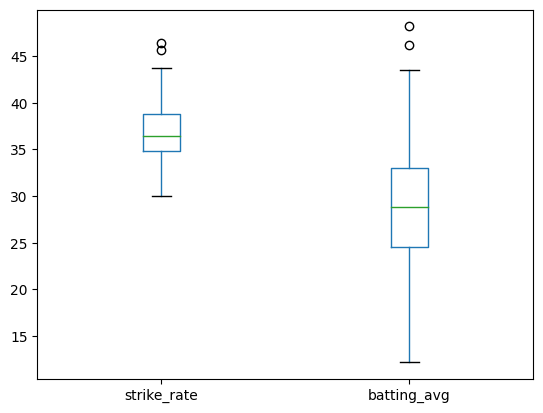

In [ ]:
#consistency_table=consistency_table[(consistency_table['total_run']>500)&(consistency_table['ballnumber']>100)]
consistency_table.boxplot(column =['strike_rate','batting_avg'], grid = False)

In [ ]:
#bowler consistency
consistency_table_bowler=pd.DataFrame(df.groupby(['bowler'])['total_run','isWicketDelivery','ballnumber'].sum().reset_index())
print("Mean no of balls delivered :",consistency_table_bowler['ballnumber'].mean())
print("Mean wickets given :",consistency_table_bowler['isWicketDelivery'].mean())


Mean no of balls delivered : 1732.832627118644
Mean wickets given : 23.625


<ipython-input-34-18651ec8c045>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  consistency_table_bowler=pd.DataFrame(df.groupby(['bowler'])['total_run','isWicketDelivery','ballnumber'].sum().reset_index())


<Axes: >

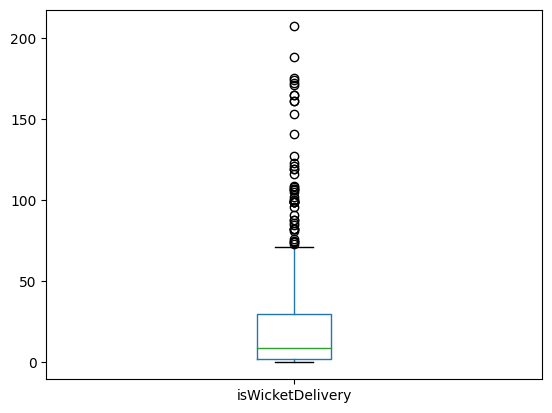

In [ ]:
consistency_table_bowler.boxplot(column =['isWicketDelivery'], grid = False)


<Axes: >

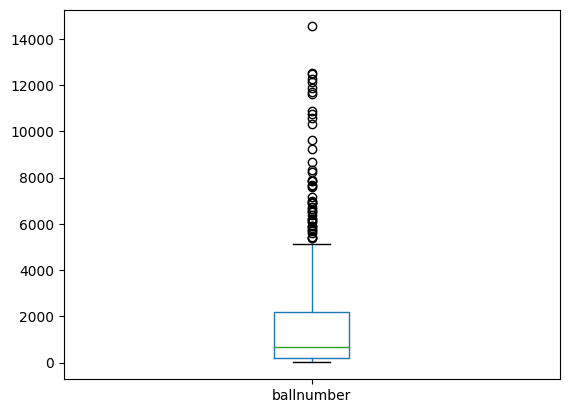

In [ ]:
consistency_table_bowler.boxplot(column =['ballnumber'], grid = False)

In [ ]:
#now we will check mean wickets taken and discard less than that
consistency_table_bowler=consistency_table_bowler[(consistency_table_bowler['isWicketDelivery']>23)&(consistency_table_bowler['ballnumber']>1732)]

In [ ]:
consistency_table_bowler['bowling_avg']= consistency_table_bowler['total_run']/consistency_table_bowler['isWicketDelivery']
consistency_table_bowler['economy']=(consistency_table_bowler['total_run']/consistency_table_bowler['ballnumber'])*6
consistency_table_bowler.sort_values('bowling_avg',ascending=False)


,bowler,total_run,isWicketDelivery,ballnumber,bowling_avg,economy
27,AD Mathews,1095,28,2873,39.107143,2.286808
390,SK Raina,1139,30,3328,37.966667,2.053486
154,I Sharma,2779,74,7644,37.554054,2.181319
65,B Lee,1126,30,3343,37.533333,2.020939
238,M Kartik,1418,39,4249,36.358974,2.002353
...,...,...,...,...,...,...
160,Imran Tahir,1729,86,4760,20.104651,2.179412
196,K Rabada,2023,108,5439,18.731481,2.231660
250,MA Starc,725,39,2258,18.589744,1.926484
393,SL Malinga,3486,188,10895,18.542553,1.919780


<Axes: >

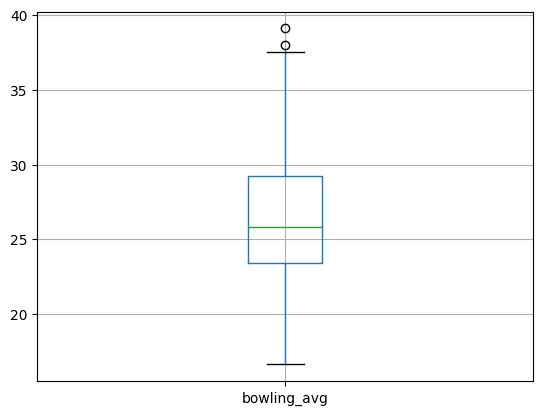

In [ ]:
consistency_table_bowler.boxplot(column =['bowling_avg'], grid = True)

<Axes: >

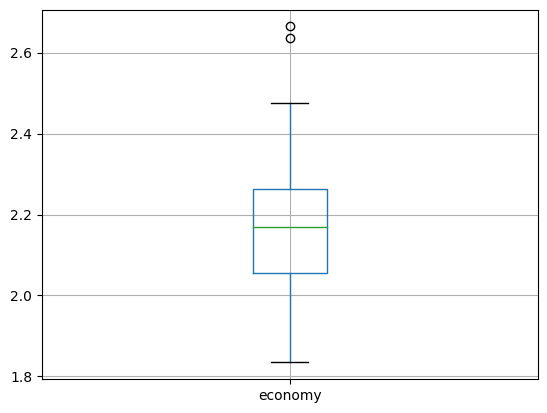

In [ ]:
consistency_table_bowler.boxplot(column =['economy'], grid = True)

In [ ]:
#consistency on the basis of sd
batsman_sd=df.groupby(["batter","ID"])['total_run','isWicketDelivery','ballnumber'].sum().reset_index()
batsman_sd
#lets evaluate total runs made


<ipython-input-43-7abc0f625839>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  batsman_sd=df.groupby(["batter","ID"])['total_run','isWicketDelivery','ballnumber'].sum().reset_index()


,batter,ID,total_run,isWicketDelivery,ballnumber
0,A Ashish Reddy,548346,10,1,34
1,A Ashish Reddy,548352,3,1,12
2,A Ashish Reddy,548359,12,1,26
3,A Ashish Reddy,548373,10,0,10
4,A Ashish Reddy,548376,5,1,18
...,...,...,...,...,...
14224,Z Khan,980903,4,1,38
14225,Z Khan,980993,2,1,8
14226,Z Khan,1082595,1,0,5
14227,Z Khan,1082635,2,1,40


In [ ]:
print(batsman_sd['total_run'].mean())
print(batsman_sd['ballnumber'].mean())

20.809403331224964
57.480989528427855


<Axes: >

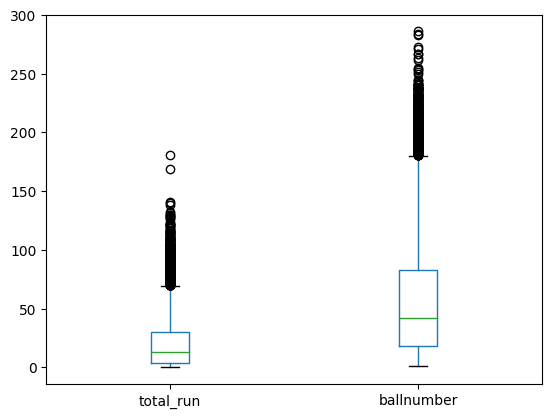

In [ ]:
batsman_sd.boxplot(column =['total_run','ballnumber'], grid = False)


In [ ]:

batsman_sd=batsman_sd[batsman_sd['total_run']>20]
batsman_sd=batsman_sd[batsman_sd['ballnumber']>57]

<Axes: >

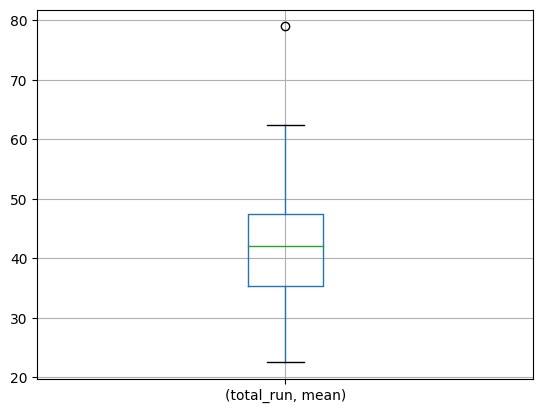

In [ ]:
v=pd.DataFrame(batsman_sd.groupby(["batter"]).agg({'total_run':[np.mean,np.std,np.min,np.max]}).dropna().reset_index())

v.columns   ##multiple index
v.boxplot([('total_run','mean')])


In [ ]:
v[v[('total_run','mean')]>47].sort_values([('total_run','std')],ascending=True).head(5)

batter  total_run                   
                      mean        std min max
242    W Jaffer  49.000000   5.656854  45  53
171     R Parag  49.800000   5.761944  44  56
199    S Vidyut  49.000000   8.485281  43  55
148    NK Patel  51.500000   9.192388  45  58
160  PJ Cummins  61.666667  10.785793  54  74

In [ ]:
bowler_sd=df.groupby(["bowler","ID"])['total_run','isWicketDelivery','ballnumber'].sum().reset_index()


<ipython-input-51-e88086e40926>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bowler_sd=df.groupby(["bowler","ID"])['total_run','isWicketDelivery','ballnumber'].sum().reset_index()


In [ ]:
print(bowler_sd['isWicketDelivery'].mean())
print(bowler_sd['ballnumber'].mean())

0.9935846030473136
72.8768600196026


<Axes: >

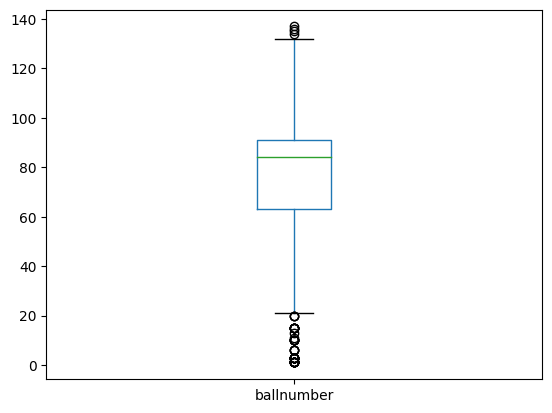

In [ ]:
bowler_sd.boxplot(column =['ballnumber'], grid = False)


<Axes: >

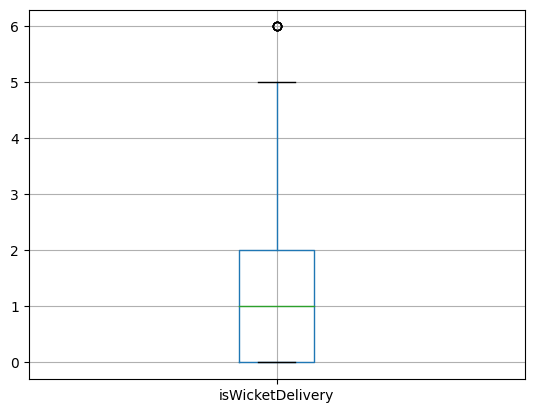

In [ ]:
bowler_sd.boxplot(column =['isWicketDelivery'], grid = True)

In [ ]:
bowler_sd=bowler_sd[ (bowler_sd['ballnumber']>=70)&(bowler_sd['isWicketDelivery']>=.993)]
#bowler_sd=bowler_sd[bowler_sd['ballnumber']>=20]


<Axes: >

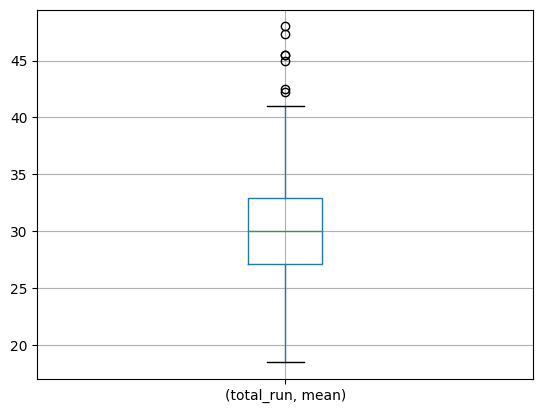

In [ ]:

v2=bowler_sd.groupby(["bowler"]).agg({'total_run':[np.mean,np.std,np.min,np.max]}).dropna().reset_index()
v2.boxplot([('total_run','mean')])



In [ ]:
v2[v2[('total_run','mean')]<25].sort_values([('total_run','std')],ascending=True).head(5)

bowler  total_run                  
                           mean       std min max
69      MC Henriques  15.666667  1.527525  14  17
68          MA Starc  22.750000  2.217356  21  26
28      DE Bollinger  22.750000  2.217356  21  26
10        AG Murtaza  19.000000  2.645751  16  21
81  Mukesh Choudhary  21.500000  3.535534  19  24

In [ ]:
#consistency teamwise
batsman_consistency_teamwise= df.groupby(['BattingTeam','batter'])['total_run','isWicketDelivery','ballnumber'].sum().reset_index()

batsman_consistency_teamwise



<ipython-input-244-5493a1b50e78>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  batsman_consistency_teamwise= df.groupby(['BattingTeam','batter'])['total_run','isWicketDelivery','ballnumber'].sum().reset_index()


,BattingTeam,batter,total_run,isWicketDelivery,ballnumber
0,Chennai Super Kings,A Flintoff,72,2,203
1,Chennai Super Kings,A Mukund,0,1,7
2,Chennai Super Kings,A Nehra,4,2,36
3,Chennai Super Kings,AS Rajpoot,2,0,28
4,Chennai Super Kings,AT Rayudu,1837,54,5028
...,...,...,...,...,...
1099,Sunrisers Hyderabad,Washington Sundar,113,7,293
1100,Sunrisers Hyderabad,X Thalaivan Sargunam,10,1,55
1101,Sunrisers Hyderabad,Y Venugopal Rao,549,25,1668
1102,Sunrisers Hyderabad,YK Pathan,319,12,970


<Axes: >

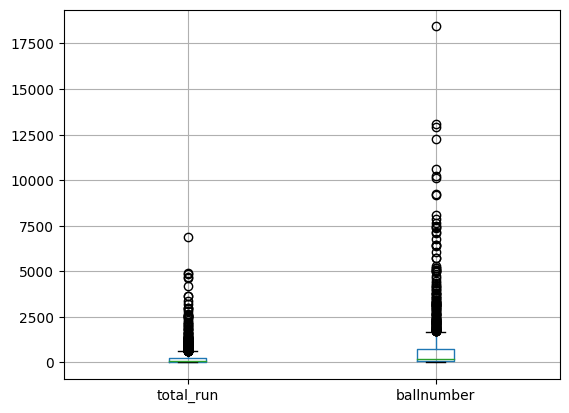

In [ ]:
batsman_consistency_teamwise.boxplot(column =['total_run','ballnumber'], grid = True)

In [ ]:
batsman_consistency_teamwise=batsman_consistency_teamwise[batsman_consistency_teamwise['total_run']>500]
batsman_consistency_teamwise=batsman_consistency_teamwise[batsman_consistency_teamwise['ballnumber']>500]
batsman_consistency_teamwise

,BattingTeam,batter,total_run,isWicketDelivery,ballnumber
4,Chennai Super Kings,AT Rayudu,1837,54,5028
6,Chennai Super Kings,BB McCullum,897,28,2320
12,Chennai Super Kings,DJ Bravo,1067,40,2816
17,Chennai Super Kings,DR Smith,1030,31,2596
18,Chennai Super Kings,F du Plessis,2813,74,7464
...,...,...,...,...,...
1091,Sunrisers Hyderabad,TL Suman,564,17,1666
1094,Sunrisers Hyderabad,V Shankar,517,22,1519
1097,Sunrisers Hyderabad,WP Saha,594,24,1668
1101,Sunrisers Hyderabad,Y Venugopal Rao,549,25,1668


In [ ]:
batsman_consistency_teamwise['batting_avg']= batsman_consistency_teamwise['total_run']/batsman_consistency_teamwise['isWicketDelivery']
batsman_consistency_teamwise['strike_rate']=batsman_consistency_teamwise['total_run']/batsman_consistency_teamwise['ballnumber']*100
batsman_consistency_teamwise.sort_values('batting_avg',ascending=False).groupby('BattingTeam').head(1).reset_index()

,index,BattingTeam,batter,total_run,isWicketDelivery,ballnumber,batting_avg,strike_rate
0,379,Lucknow Super Giants,KL Rahul,653,11,1655,59.363636,39.456193
1,559,Punjab Kings,KL Rahul,2631,47,6455,55.978723,40.759101
2,216,Gujarat Titans,HH Pandya,512,10,1408,51.200000,36.363636
3,1008,Sunrisers Hyderabad,DA Warner,4216,83,10230,50.795181,41.212121
4,685,Rajasthan Royals,JC Buttler,2406,51,5719,47.176471,42.070292
5,436,Mumbai Indians,JP Duminy,603,13,1899,46.384615,31.753555
6,119,Delhi Capitals,JP Duminy,1061,23,2902,46.130435,36.560992
7,858,Royal Challengers Bangalore,CH Gayle,3389,74,7850,45.797297,43.171975
8,38,Chennai Super Kings,ML Hayden,1205,28,3088,43.035714,39.022021
9,828,Rising Pune Supergiants,SPD Smith,1314,33,3537,39.818182,37.150127


#Problem statements and analysis

Problem statement 1:
Give insights on face-offs between any batter and any bowler

*   How many runs made by Batter A against bowler B

*   What are their respective Average considering only the face offs


In [ ]:
#problem : insight of any batsman vs bowler

#batter=input("Please enter the batter name")
#bowler=input("Please enter the bowler name")
#def headon(batter,bowler):


batter='JC Buttler'
bowler= 'Yash Dayal'
runs_made=df[(df['batter']==batter)&(df['bowler']== bowler)]['total_run'].sum()
balls= df[(df['batter']==batter)&(df['bowler']==bowler)]['ballnumber'].count()
wickets= len(df[(df['batter']==batter)&(df['bowler']==bowler)&(df['isWicketDelivery']==1)])
economy=(runs_made/balls)*6
if wickets!=0:
    Batting_avg =(runs_made/wickets)
else:
    Batting_avg= 'Infinity'
d={'Stats for' : (batter+" vs "+bowler), 'Balls':(balls),'Runs Scored':(runs_made),'economy':(economy),'Batting Avg':(Batting_avg)}
Stats=pd.DataFrame(data=d,index=[1])
v=display(Stats)


,Stats for,Balls,Runs Scored,economy,Batting Avg
1,JC Buttler vs Yash Dayal,28,67,14.357143,67.0


Problem Statement 2:

*   What are the stats of wickets taken?

*   How is a batsman most likely to get out?

*   In what way is a batsman least likely to be out?






['caught' 'caught and bowled' 'run out' 'bowled' 'stumped' 'lbw'
 'hit wicket' 'retired hurt' 'retired out' 'obstructing the field']


<Axes: >

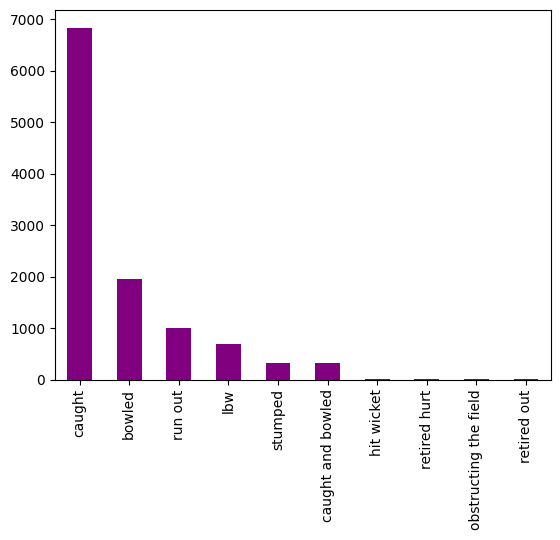

In [ ]:
#problem 2
wicket_type= df[(df['isWicketDelivery']==1)]

print(wicket_type['kind'].unique())

common=pd.DataFrame(wicket_type['kind'].value_counts()).head(1)
rare=pd.DataFrame(wicket_type['kind'].value_counts()).sort_values('kind',ascending=True).head(1)

wicket_type['kind'].value_counts().plot(kind='bar',color='purple')


In [ ]:
#given id, display playing teams and match winner


Problem statement 3:


*   The data only mentions batting team, not bowling team.
*   Given a match ID, find the playing teams
*   Also find which team won






In [ ]:
#problem 3

#first we have to create a column of batting team derived from the batting team column in the data
batting_list=total_runs['BattingTeam'].tolist()
l1=len(batting_list)


In [ ]:
bowling_list=[]

In [ ]:
for i in range(l1):
  if i%2==0:
    a=batting_list[i+1]
    bowling_list.insert(i,a)
  else:
    a=batting_list[i-1]
    bowling_list.insert(i,a)

len(bowling_list)

1928

In [ ]:
len(bowling_list)

1928

In [ ]:
total_runs.insert(loc=3,column="BowlingTeam",value=bowling_list)

In [ ]:
total_runs.head(5)

,ID,innings,BattingTeam,BowlingTeam,total_run
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,222
1,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,82
2,335983,1,Chennai Super Kings,Punjab Kings,240
3,335983,2,Punjab Kings,Chennai Super Kings,207
4,335984,1,Rajasthan Royals,Delhi Capitals,129
...,...,...,...,...,...
1923,1312198,2,Lucknow Super Giants,Royal Challengers Bangalore,193
1924,1312199,1,Royal Challengers Bangalore,Rajasthan Royals,157
1925,1312199,2,Rajasthan Royals,Royal Challengers Bangalore,161
1926,1312200,1,Rajasthan Royals,Gujarat Titans,130


In [ ]:
#now we can find playing teams and winning team

def playingteams(k):
  t1=total_runs[(total_runs['ID']==k)&(total_runs['innings']==1)]['BattingTeam'].tolist()
  t2=total_runs[(total_runs['ID']==k)&(total_runs['innings']==1)]['BowlingTeam'].tolist()
  print(t1," vs ",t2)
  return

def winningteam(k):
  a=total_runs[(total_runs['ID']==k)&(total_runs['innings']==1)]['total_run'].tolist()
  b=total_runs[(total_runs['ID']==k)&(total_runs['innings']==2)]['total_run'].tolist()

  if a>b:
    winteam=(total_runs[(total_runs['ID']==k)&(total_runs['innings']==1)]['BattingTeam']).tolist()


  elif a<b:
    winteam=(total_runs[(total_runs['ID']==k)&(total_runs['innings']==2)]['BattingTeam']).tolist()

  else:
    winteam="tie"

  return winteam

playingteams(335984)
winningteam(335984)

['Rajasthan Royals']  vs  ['Delhi Capitals']


['Delhi Capitals']

***Problem Statement 4:***

*   How many innings are played in the matches
*   List all the matches where more than 2 innings were played


<Axes: xlabel='innings', ylabel='total'>

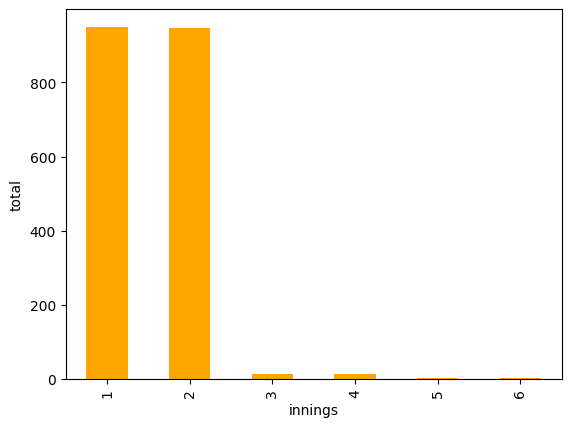

In [ ]:
#problem4 :find out the matches that were played for more than two innings

total_runs['innings'].value_counts().plot(kind='bar',color='orange',xlabel='innings',ylabel='total')

In [ ]:
ini=[3,4]
inin=[5,6]
ininin=[1,2]
inings4=total_runs[total_runs['innings'].isin(ini)]['ID'].unique()

for i in inings4:
  playingteams(i)

['Rajasthan Royals']  vs  ['Kolkata Knight Riders']
['Punjab Kings']  vs  ['Chennai Super Kings']
['Royal Challengers Bangalore']  vs  ['Punjab Kings']
['Delhi Capitals']  vs  ['Kolkata Knight Riders']
['Rajasthan Royals']  vs  ['Punjab Kings']
['Rajasthan Royals']  vs  ['Kolkata Knight Riders']
['Gujarat Titans']  vs  ['Mumbai Indians']
['Kolkata Knight Riders']  vs  ['Delhi Capitals']
['Mumbai Indians']  vs  ['Sunrisers Hyderabad']
['Delhi Capitals']  vs  ['Punjab Kings']
['Kolkata Knight Riders']  vs  ['Sunrisers Hyderabad']
['Mumbai Indians']  vs  ['Punjab Kings']
['Royal Challengers Bangalore']  vs  ['Mumbai Indians']
['Delhi Capitals']  vs  ['Sunrisers Hyderabad']


In [ ]:
inings6=total_runs[total_runs['innings'].isin(inin)]['ID'].unique()
for i in inings6:
  playingteams(i)

['Mumbai Indians']  vs  ['Punjab Kings']


Problem Statement 5:

*   List out longest and shortest matches played




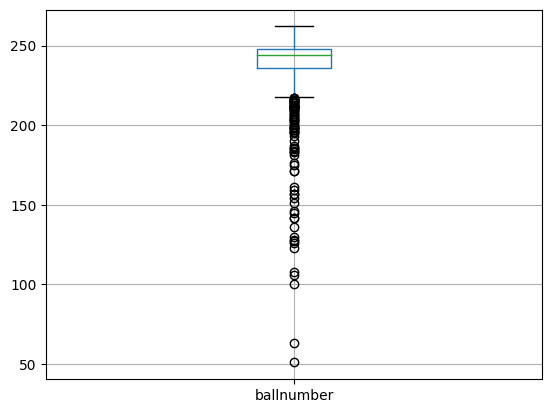

In [ ]:
df.head(3)
lengths=pd.DataFrame(df[df["innings"].isin(ininin)].groupby(['ID'])['ballnumber'].count().reset_index())
plotofballs=lengths.boxplot(column =['ballnumber'], grid = True)



In [ ]:
lengths.sort_values("ballnumber",ascending=False).head(1)
playingteams(1216517)

['Mumbai Indians']  vs  ['Punjab Kings']


In [ ]:
lengths.sort_values("ballnumber",ascending=True).head(1)
playingteams(1178424)

['Royal Challengers Bangalore']  vs  ['Rajasthan Royals']


#Team Formation

We need

*   4 Batsmen
*   4 Bowlers
*   3 Allrounders   
*   Wicket Keeper







In [ ]:
tot=[len(df['batter'].unique()),len(df['bowler'].unique())]
typee=['Batter','Bowler']

dict={'Type':typee,'total':tot}
pd.DataFrame(dict).plot(kind='bar')

,Type,total
0,Batter,605
1,Bowler,472


To choose on the basis of average anf strike rate, we need to know the range, min,max,mean

In [ ]:
print(consistency_table['batting_avg'].max())
print(consistency_table['batting_avg'].mean())
print(consistency_table['batting_avg'].min())


48.17857142857143
29.25430662272674
12.156862745098039


In [ ]:
print(consistency_table['strike_rate'].max())
print(consistency_table['strike_rate'].mean())
print(consistency_table['strike_rate'].min())


46.34251290877797
36.82675672625666
29.939460649422124


In [ ]:
print(consistency_table_bowler['bowling_avg'].mean())
print(consistency_table_bowler['bowling_avg'].min())
print(consistency_table_bowler['bowling_avg'].max())

26.11235978946099
11.458333333333334
40.34782608695652


In [ ]:
print(consistency_table_bowler['economy'].mean())
print(consistency_table_bowler['economy'].min())
print(consistency_table_bowler['economy'].max())

2.1611744218943523
1.680244399185336
2.6646058732612055


In [ ]:
#Starting with all rounders

top_batters=set(consistency_table.sort_values('strike_rate').head(30)['batter'])
top_bowlers=set(consistency_table_bowler.sort_values("economy").head(30)['bowler'])
top_batters2=set(consistency_table.sort_values('batting_avg').head(25)['batter'])
top_bowlers2=set(consistency_table_bowler.sort_values("bowling_avg").head(25)['bowler'])



one=top_batters&top_bowlers
two=top_batters&top_bowlers2
three=top_batters2&top_bowlers
four=top_batters2&top_bowlers2
print(one,two,three,four)

{'JP Duminy', 'R Ashwin'} set() {'Harbhajan Singh', 'SP Narine', 'R Ashwin'} set()


In [ ]:
allrounders=['JP Duminy', 'R Ashwin','Harbhajan Singh', 'SP Narine']

In [ ]:
#checking the stats for chosen players
consistency_table[consistency_table['batter'].isin(allrounders)]

,batter,total_run,isWicketDelivery,ballnumber,batting_avg,strike_rate
195,Harbhajan Singh,895,56,2434,15.982143,36.770748
236,JP Duminy,2131,49,6132,43.489796,34.752120
405,R Ashwin,678,48,2183,14.125000,31.058177
508,SP Narine,1101,64,2415,17.203125,45.590062


In [ ]:
consistency_table_bowler[consistency_table_bowler['bowler'].isin(allrounders)]

,bowler,total_run,isWicketDelivery,ballnumber,bowling_avg,economy
149,Harbhajan Singh,4101,161,12520,25.472050,1.965335
183,JP Duminy,847,23,2521,36.826087,2.015867
317,R Ashwin,4596,174,14531,26.413793,1.897736
401,SP Narine,3907,171,12481,22.847953,1.878215


In [ ]:
#finding wicket keepers
wicket_keepers=pd.DataFrame(df[(df['kind']=='stumped')]['fielders_involved'])
print(wicket_keepers.value_counts().head(1))

fielders_involved
MS Dhoni             39
dtype: int64


In [ ]:
#to check if wicket keeper is also a good batter/bowler

In [ ]:
wicketKeeper=['MS Dhoni']

In [ ]:
#to check if the player is batsman or bower
def checkPlayer(a):
  l1=len(df[df['batter']==a])
  l2=len(df[df['bowler']==a])
  if l1==0 and l2!=0:
    print("Player is Bowler")
  elif l1!=0 and l2==0:
    print("Player is Batter")
  else:
    print("Player is an All rounder")


checkPlayer("MS Dhoni")

Player is Batter


In [ ]:
#Now we can check the stats in batsman table
consistency_table[consistency_table['batter']=='MS Dhoni']

,batter,total_run,isWicketDelivery,ballnumber,batting_avg,strike_rate
339,MS Dhoni,5221,142,14056,36.767606,37.14428


In [ ]:
#choosing batsmen
selected_batsman=set(consistency_table[(consistency_table['batting_avg']>35) ].sort_values('strike_rate').head(5)['batter'])
selected_batsman-{'JP Duminy'}



{'KS Williamson', 'LMP Simmons', 'MEK Hussey', 'SR Tendulkar'}

In [ ]:
#checking stats for chosen batsmen
consistency_table[consistency_table['batter'].isin(selected_batsman)]

,batter,total_run,isWicketDelivery,ballnumber,batting_avg,strike_rate
236,JP Duminy,2131,49,6132,43.489796,34.752120
272,KS Williamson,2190,57,6083,38.421053,36.001973
288,LMP Simmons,1127,27,3147,41.740741,35.811884
319,MEK Hussey,2064,52,5758,39.692308,35.845780
510,SR Tendulkar,2537,71,7384,35.732394,34.358072


In [ ]:
#choosing bowlers
selected_bowler=set(consistency_table_bowler[(consistency_table_bowler['bowling_avg']<21)& (consistency_table_bowler['economy']<1.95)].sort_values('economy',ascending=True).head(4)['bowler'])
selected_bowler

{'RE van der Merwe', 'Rashid Khan', 'SL Malinga', 'Sohail Tanvir'}

In [ ]:
#checking stats for chosen bowlers
consistency_table_bowler[consistency_table_bowler['bowler'].isin(selected_bowler)]

,bowler,total_run,isWicketDelivery,ballnumber,bowling_avg,economy
337,RE van der Merwe,515,25,1635,20.600000,1.889908
355,Rashid Khan,2411,119,7886,20.260504,1.834390
393,SL Malinga,3486,188,10895,18.542553,1.919780
425,Sohail Tanvir,275,24,982,11.458333,1.680244
